In [124]:
import pandas as pd
df=pd.read_csv("dataset_mood_smartphone.csv")
group_by_variable_df=df.groupby(['variable'])
df['Date'] = pd.to_datetime(df['time']).dt.date
temp_df=df.reset_index()
group_by_average_df=df.groupby(['variable','Date']).agg(total=('value', 'mean'))
group_by_average_df = group_by_average_df.reset_index()

group_by_sum_df=df.groupby(['variable','Date']).agg(total=('value', 'sum'))
group_by_sum_df = group_by_sum_df.reset_index()

In [125]:
#Step 1: Find any anomalies in the values, namely the maximum and minimum allowed value
max_min_outliers=[]
for name, group in group_by_variable_df:
    # Print the group name and the maximum value of the 'value' column for that group
    max_min_outliers.append([name[0],group['value'].min(),group['value'].max(),group['value'].isnull().sum()])

result_df=pd.DataFrame(max_min_outliers,columns=['variable','min_value','max_value','empty_count'])
print(result_df)

                variable  min_value  max_value  empty_count
0               activity      0.000      1.000            0
1         appCat.builtin -82798.871  33960.246            0
2   appCat.communication      0.006   9830.777            0
3   appCat.entertainment     -0.011  32148.677            0
4         appCat.finance      0.131    355.513            0
5            appCat.game      1.003   5491.793            0
6          appCat.office      0.003  32708.818            0
7           appCat.other      0.014   3892.038            0
8          appCat.social      0.094  30000.906            0
9          appCat.travel      0.080  10452.615            0
10        appCat.unknown      0.111   2239.937            0
11      appCat.utilities      0.246   1802.649            0
12        appCat.weather      1.003    344.863            0
13                  call      1.000      1.000            0
14    circumplex.arousal     -2.000      2.000           46
15    circumplex.valence     -2.000     

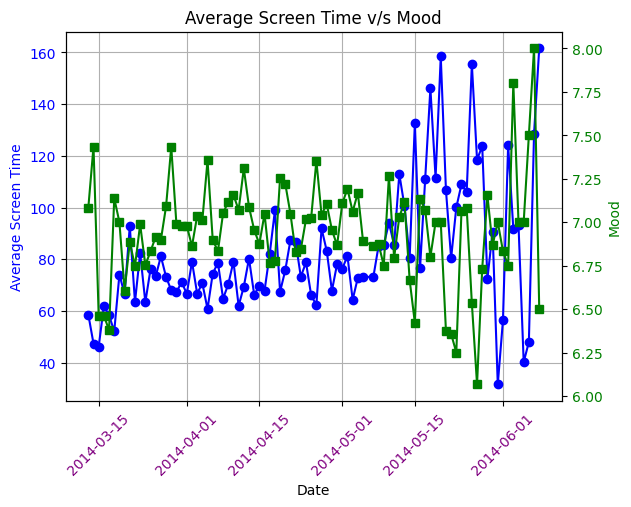

In [132]:
import matplotlib.pyplot as plt

total_screen_time=group_by_average_df[(group_by_average_df['variable']=='screen')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_screen_time, total_mood, on=['Date'], how='inner')


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot screen time on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Screen Time', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45,labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Screen Time v/s Mood')
ax1.grid(True)

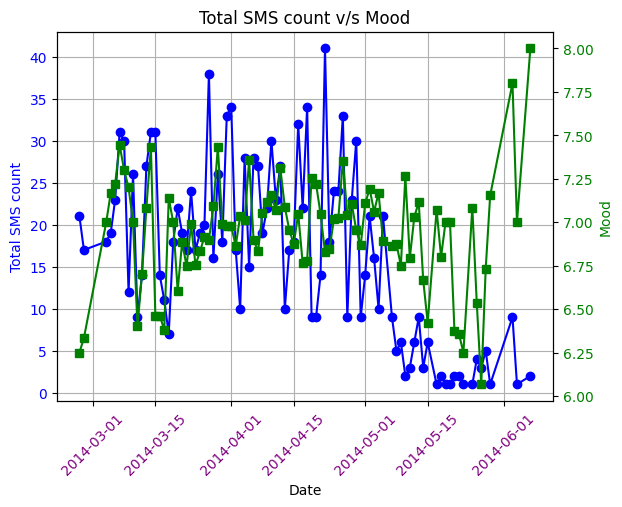

In [133]:
import matplotlib.pyplot as plt
total_sms=group_by_sum_df[(group_by_sum_df['variable']=='sms')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_sms, total_mood, on=['Date'], how='inner')

total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Total SMS count', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Total SMS count v/s Mood')
ax1.grid(True)

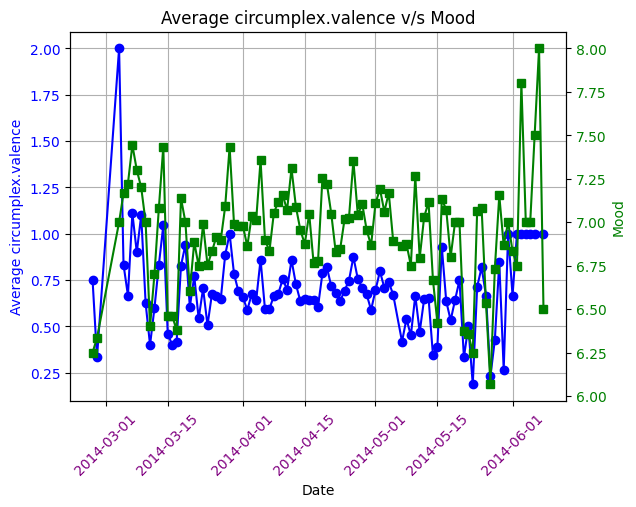

In [135]:
import matplotlib.pyplot as plt

total_valence=group_by_average_df[(group_by_average_df['variable']=='circumplex.valence')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_valence, total_mood, on=['Date'], how='inner')

total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average circumplex.valence', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average circumplex.valence v/s Mood')
ax1.grid(True)

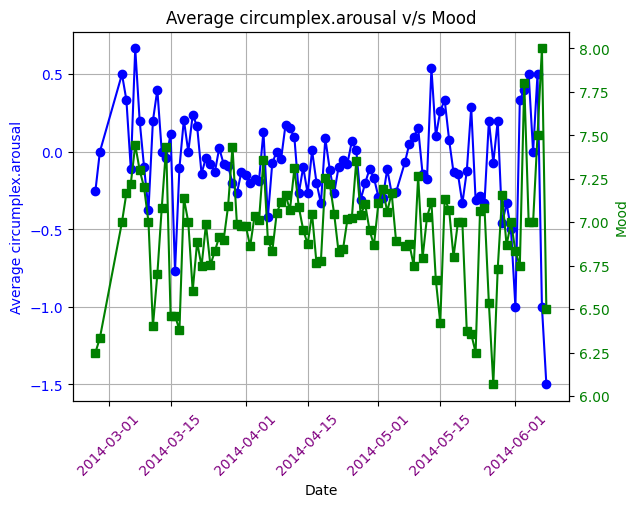

In [136]:
import matplotlib.pyplot as plt

total_ca=group_by_average_df[(group_by_average_df['variable']=='circumplex.arousal')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_ca, total_mood, on=['Date'], how='inner')

total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average circumplex.arousal', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average circumplex.arousal v/s Mood')
ax1.grid(True)

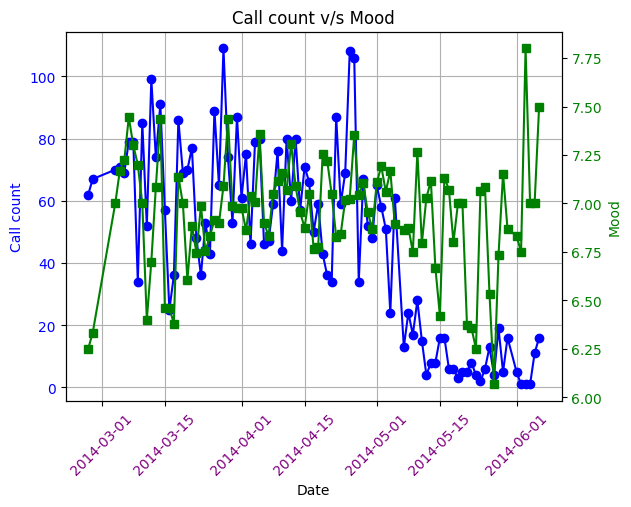

In [137]:
import matplotlib.pyplot as plt

total_call=group_by_sum_df[(group_by_sum_df['variable']=='call')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_call, total_mood, on=['Date'], how='inner')

total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Call count', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Call count v/s Mood')
ax1.grid(True)

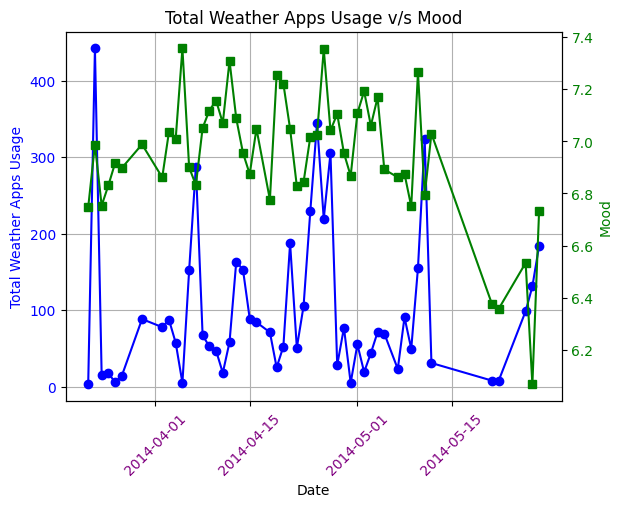

In [138]:
import matplotlib.pyplot as plt

total_weather=group_by_sum_df[(group_by_sum_df['variable']=='appCat.weather')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_weather, total_mood, on=['Date'], how='inner')

total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Total Weather Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Total Weather Apps Usage v/s Mood')
ax1.grid(True)

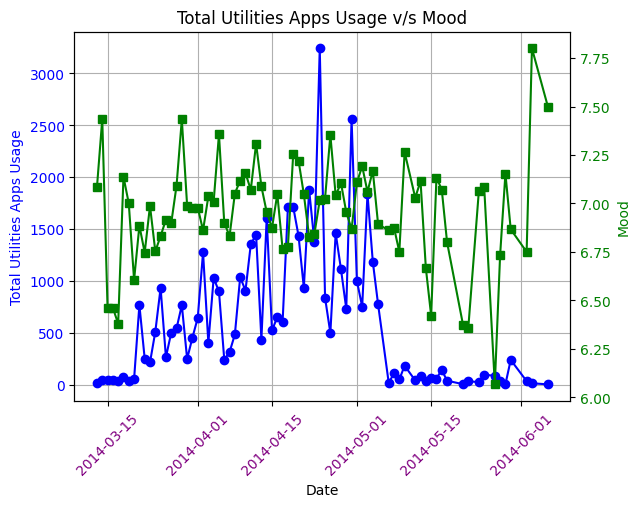

In [139]:
total_utilities=group_by_sum_df[(group_by_sum_df['variable']=='appCat.utilities')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_utilities, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Total Utilities Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Total Utilities Apps Usage v/s Mood')
ax1.grid(True)

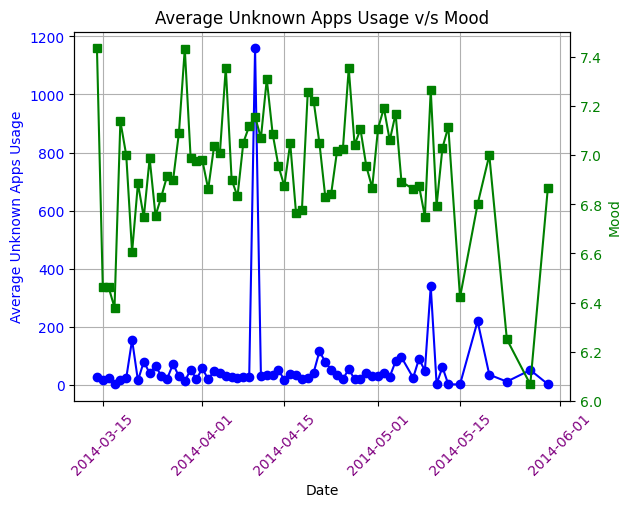

In [140]:
total_unknown=group_by_average_df[(group_by_average_df['variable']=='appCat.unknown')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_unknown, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Unknown Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Unknown Apps Usage v/s Mood')
ax1.grid(True)

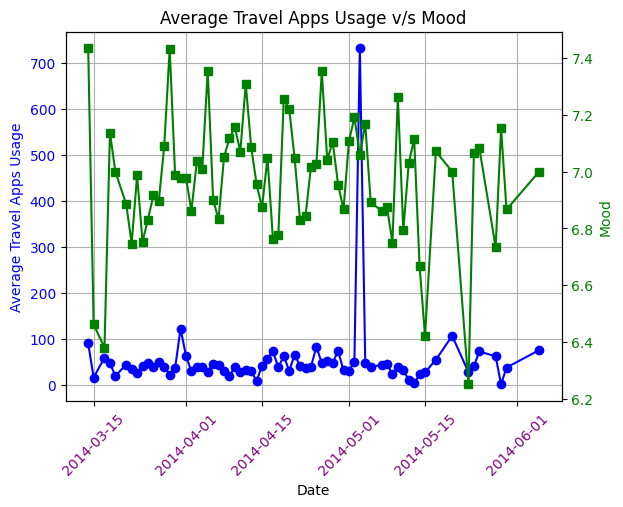

In [141]:
total_travel=group_by_average_df[(group_by_average_df['variable']=='appCat.travel')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_travel, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Travel Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Travel Apps Usage v/s Mood')
ax1.grid(True)

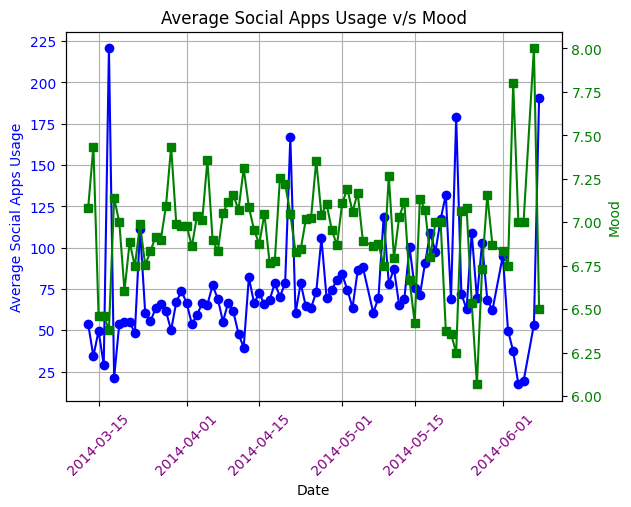

In [144]:
total_social=group_by_average_df[(group_by_average_df['variable']=='appCat.social')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_social, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Social Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Social Apps Usage v/s Mood')
ax1.grid(True)

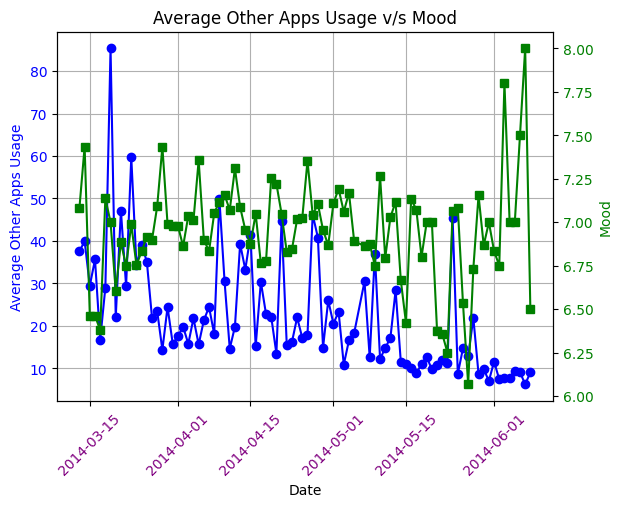

In [145]:
average_other=group_by_average_df[(group_by_average_df['variable']=='appCat.other')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(average_other, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Other Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Other Apps Usage v/s Mood')
ax1.grid(True)

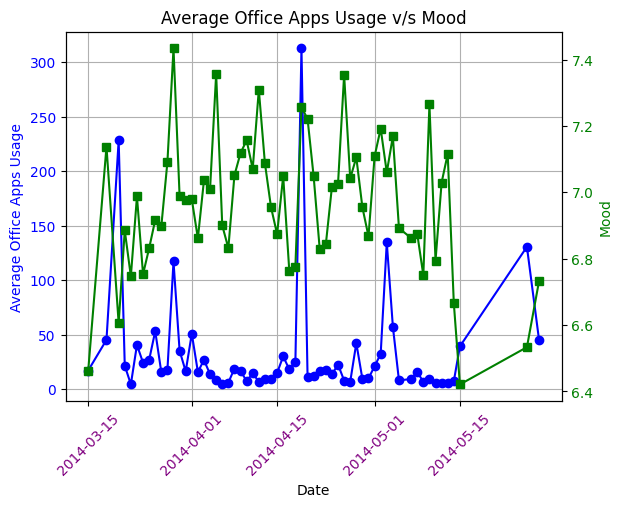

In [146]:
average_office=group_by_average_df[(group_by_average_df['variable']=='appCat.office')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(average_office, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Office Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Office Apps Usage v/s Mood')
ax1.grid(True)

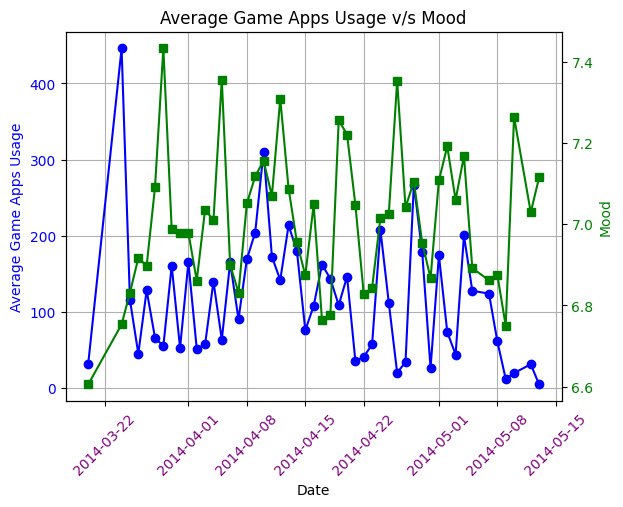

In [149]:
total_game=group_by_average_df[(group_by_average_df['variable']=='appCat.game')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_game, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Game Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Game Apps Usage v/s Mood')
ax1.grid(True)

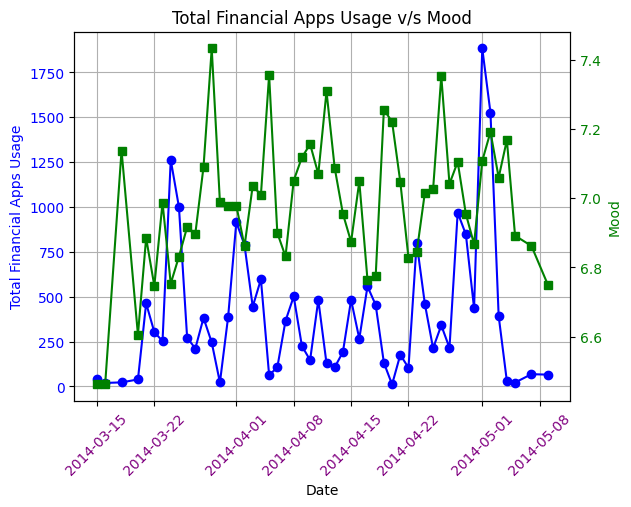

In [152]:
total_finance=group_by_sum_df[(group_by_sum_df['variable']=='appCat.finance')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_finance, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Total Financial Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Total Financial Apps Usage v/s Mood')
ax1.grid(True)

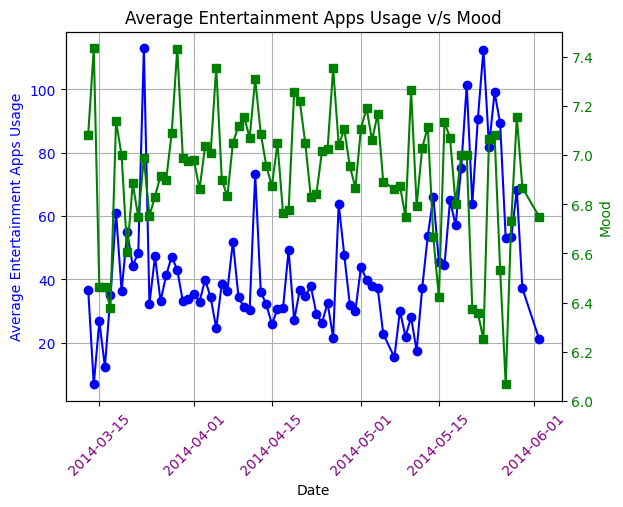

In [155]:
total_entertainment=group_by_average_df[(group_by_average_df['variable']=='appCat.entertainment')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_entertainment, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Entertainment Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Entertainment Apps Usage v/s Mood')
ax1.grid(True)

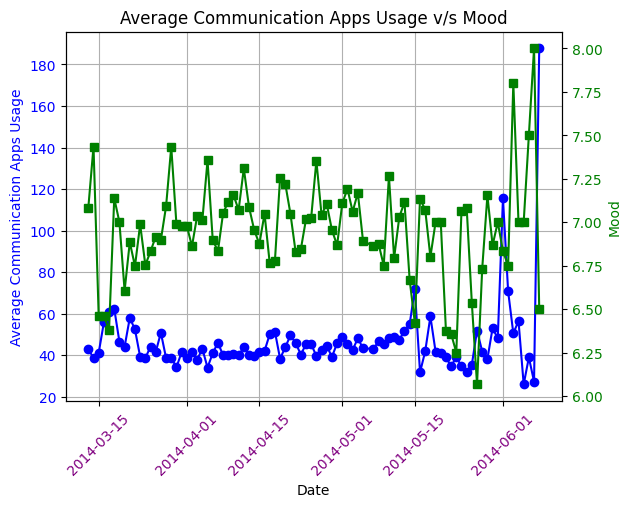

In [156]:
total_communincation=group_by_average_df[(group_by_average_df['variable']=='appCat.communication')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_communincation, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Communication Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Communication Apps Usage v/s Mood')
ax1.grid(True)

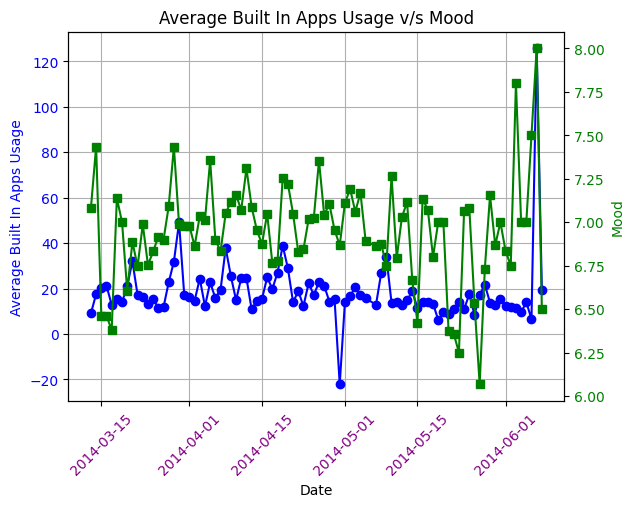

In [157]:
total_builtin=group_by_average_df[(group_by_average_df['variable']=='appCat.builtin')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_builtin, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Average Built In Apps Usage', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Average Built In Apps Usage v/s Mood')
ax1.grid(True)

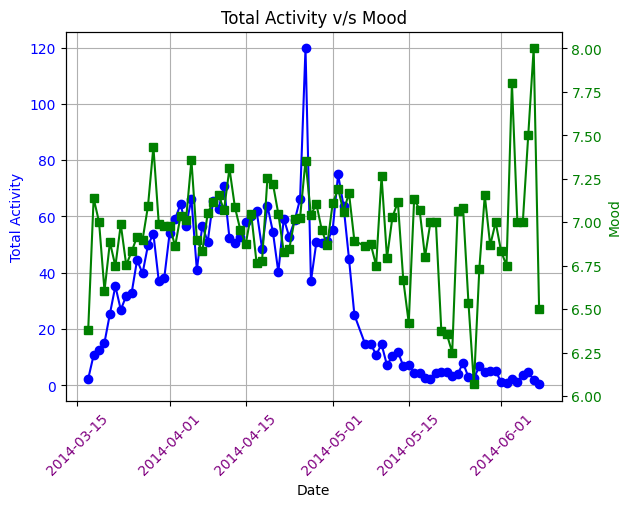

In [158]:
total_activity=group_by_sum_df[(group_by_sum_df['variable']=='activity')]
total_mood=group_by_average_df[(group_by_average_df['variable']=='mood')]
merged_df = pd.merge(total_activity, total_mood, on=['Date'], how='inner')

import matplotlib.pyplot as plt


total_and_date=merged_df[['total_x','Date','total_y']]

x=total_and_date['Date']
y1=total_and_date['total_x']
y2=total_and_date['total_y']

fig, ax1 = plt.subplots()

# Plot number of sms on the primary y-axis (left)
ax1.plot(x, y1, color='blue', label='Screen Time', marker='o')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Total Activity', color='blue')  # Y-axis label for screen time
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks
ax1.tick_params(axis='x',rotation=45, labelcolor='purple')
# Create a secondary y-axis for mood
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(x, y2, color='green', label='Mood', marker='s')
ax2.set_ylabel('Mood', color='green')  # Y-axis label for mood
ax2.tick_params(axis='y', labelcolor='green')  # Set the color of the y-axis ticks

# Add title and grid
plt.xticks(rotation=45)
plt.title('Total Activity v/s Mood')
ax1.grid(True)